#### Steganography

In [15]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

##### Encoder

In [16]:
def steganography_encode(input_image, input_text, bit_plane):
    # Check if the message can be encoded in the image
    if(len(input_text) > (input_image.size // 8)):
        raise ValueError("Insufficient bytes")

    # Get the bits of the input text
    input_ascii = np.frombuffer(input_text.encode(), 'S1').view(np.uint8)
    input_bits = np.unpackbits(input_ascii)

    # Flatten input image array
    output_flat = input_image.ravel()
    output_use = output_flat[:len(input_bits)]

    # You can set [0,1]:
    # 1: x = x | pos
    # 0: x = x & ~pos
    mask_one = 1 << bit_plane
    mask_zero = ~mask_one

    output_flat[:len(input_bits)] = np.where(
        input_bits, output_use | mask_one, output_use & mask_zero)

    # Recover image shape
    output_image = output_flat.reshape(input_image.shape)
    return output_image


##### Decoder

In [17]:
def steganography_decode(input_image, bit_plane):
    # Get k Least Significant Bit
    mask = 1 << bit_plane
    #input_bits = (input_image & mask).ravel() // bit_plane
    input_bits = (input_image & mask).ravel() // mask

    # Broadcast to array nx8 Dim
    output_bits = input_bits.reshape((-1, 8))
    output_bytes = np.sum(output_bits * [128, 64, 32, 16, 8, 4, 2, 1], axis=1)

    output_text = ''
    for ascii in output_bytes:
        if ascii == 0:
            break
        output_text += chr(ascii)

    return output_text

##### Test

In [18]:
input_path_image = "./images/baboon.png"
input_path_text = "./data/small.txt"

bit_plane = 5
input_image = cv.imread(input_path_image, cv.IMREAD_COLOR)
input_text = ''
with open(input_path_text, 'r') as file:
    input_text = file.read() + chr(0)


encode_image = steganography_encode(input_image, input_text, bit_plane)
decode_text = steganography_decode(encode_image, bit_plane)


Text(0.5, 1.0, 'Encode image')

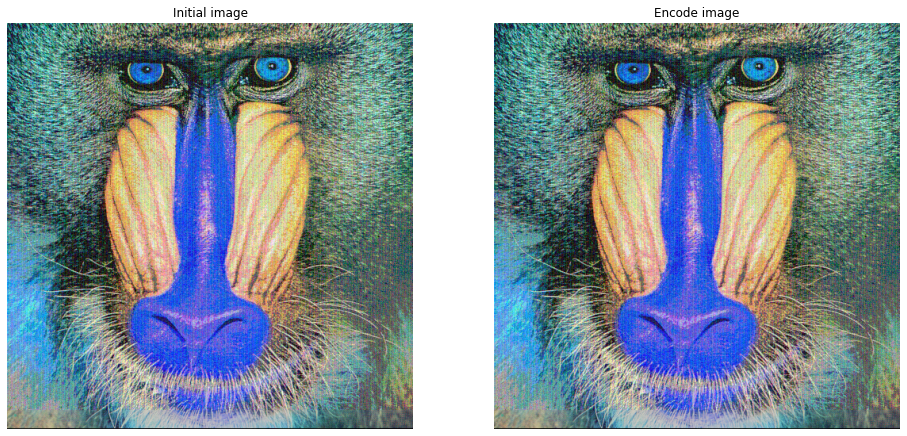

In [19]:
fig = plt.figure(figsize=(16, 10))

rows, cols = 1, 2

# showing image
fig.add_subplot(rows, cols, 1)
plt.imshow(input_image)
plt.axis('off')
plt.title("Initial image")

# showing image
fig.add_subplot(rows, cols, 2)
plt.imshow(encode_image)
plt.axis('off')
plt.title("Encode image")


##### Bit Plane

In [20]:
def show_bit_planes(img, planes):
    fig, axs = plt.subplots(planes, 4, figsize=(20, 20))

    for plane in range(planes):
        img_plane = (img >> plane) & 1
        img_plane = np.where(img_plane, 255, 0)

        img_r = np.zeros(img_plane.shape)
        img_r[:, :, 0] = img_plane[:, :, 0]

        img_g = np.zeros(img_plane.shape)
        img_g[:, :, 1] = img_plane[:, :, 1]

        img_b = np.zeros(img_plane.shape)
        img_b[:, :, 2] = img_plane[:, :, 2]

        axs[plane, 0].imshow(img_plane)
        axs[plane, 1].imshow(img_r.astype(int))
        axs[plane, 2].imshow(img_g.astype(int))
        axs[plane, 3].imshow(img_b.astype(int))


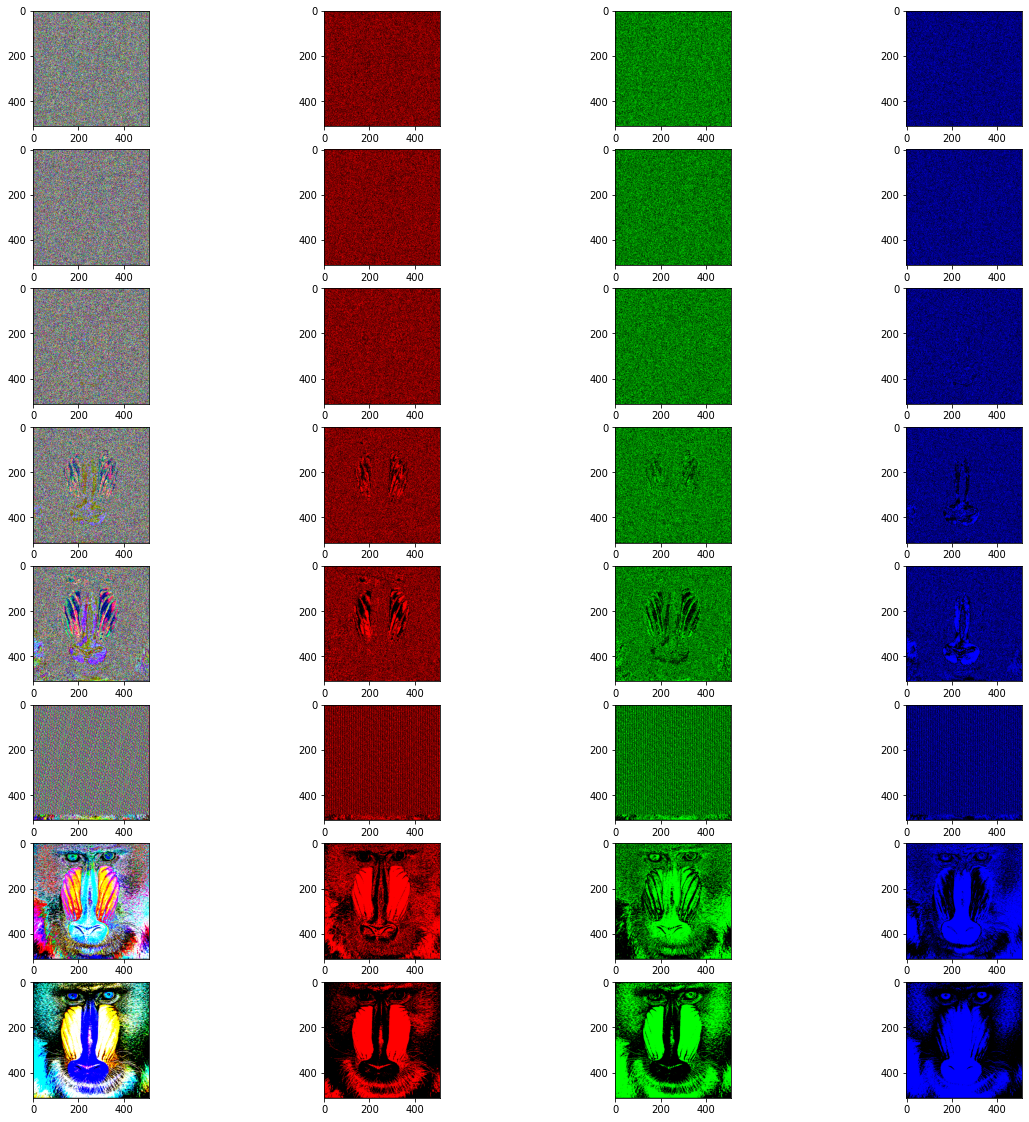

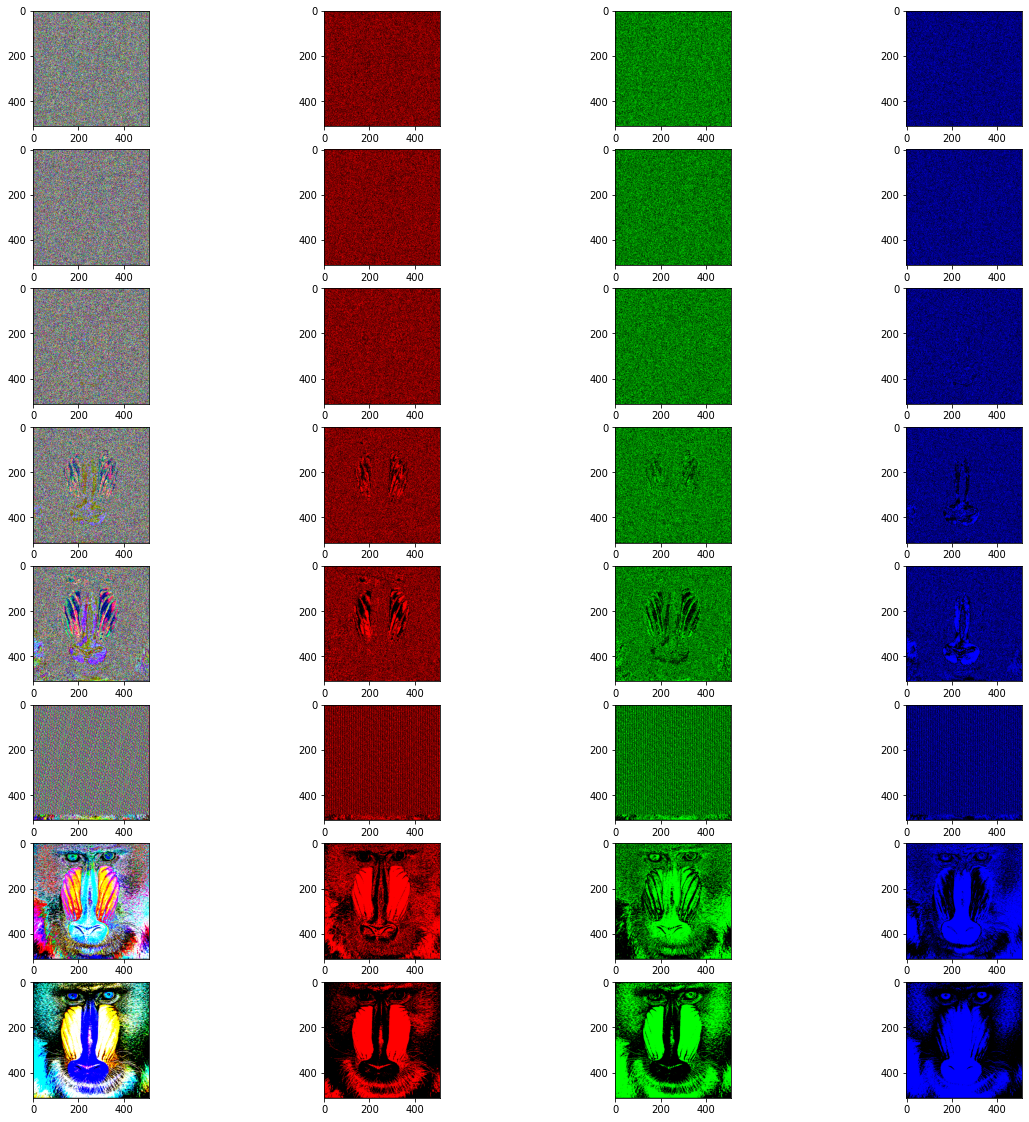

In [22]:
show_bit_planes(input_image, 8)
show_bit_planes(encode_image, 8)